# 1. Hierarchical Clustering

In [1]:
# import modules
import json
from pprint import pprint
import pandas as pd
import numpy as np
#Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster

from sklearn.decomposition import PCA
from sklearn.neighbors import DistanceMetric
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import pairwise_distances

# additional set up
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) # suppress scientific float notation

# constants and parameters
DATA_PATH = './data/'
IMG_PATH = './'

# load data 
with open(f'{DATA_PATH}data_file_20181203.json') as f:
    data = json.load(f)

In [2]:
# create data frame
df = {'Name': np.zeros(len(data['quantlets'])), 
      'author_of_last_comm': np.zeros(len(data['quantlets'])),
      'is_debuggable': np.zeros(len(data['quantlets'])), 
      'grade': np.zeros(len(data['quantlets'])),
      'keywords': np.zeros(len(data['quantlets']))}

df = pd.DataFrame(data=df)

In [3]:
# extract the columns we need
counter=0
for c, i in enumerate(data['quantlets']):
    print(i)
    df.loc[c,'Name'] = i
    df.loc[c,'author_of_first_comm'] = data['quantlets'][i]['commit_first']['commit']['author']['name']
    df.loc[c,'author_of_last_comm'] = data['quantlets'][i]['commit_last']['commit']['author']['name']
    df.loc[c,'is_debuggable'] = data['quantlets'][i]['is_debuggable']
    try:
        df.loc[c,'grade'] = data['quantlets'][i]['grade']
        df.loc[c,'keywords'] = ' '.join(str(e) for e in set(data['quantlets'][i]['keyword_list']))
    except:
        df.loc[c,'grade'] = 'did not work'
        df.loc[c,'keywords'] ='did not work'
        counter+=1
print(f'Could not load {counter} quantlets.')
df = df[df['is_debuggable']==True]

ADM/HermPolyPlot/Metainfo.txt
ARR/ARRboxage/Metainfo.txt
ARR/ARRboxgscit/Metainfo.txt
ARR/ARRboxhb/Metainfo.txt
ARR/ARRcormer/Metainfo.txt
ARR/ARRdenmer2d/Metainfo.txt
ARR/ARRdenmer3d/Metainfo.txt
ARR/ARRhexage/Metainfo.txt
ARR/ARRhexcit/Metainfo.txt
ARR/ARRhexhin/Metainfo.txt
ARR/ARRhismer/Metainfo.txt
ARR/ARRmosage/Metainfo.txt
ARR/ARRmosagegr/Metainfo.txt
ARR/ARRmossub/Metainfo.txt
ARR/ARRpcpgscit/Metainfo.txt
ARR/ARRpcphb/Metainfo.txt
ARR/ARRpcpmer/Metainfo.txt
ARR/ARRpcprp/Metainfo.txt
ARR/ARRqrqqhb/Metainfo.txt
ARR/ARRscaage/Metainfo.txt
ARR/ARRscamer/Metainfo.txt
Adaptive_Penalized_Macro_Factors/Metainfo.txt
BCS-1/BCS_Kernel_nhTemp/Metainfo.txt
BCS-1/BCS_MLRleaps/Metainfo.txt
BCS-1/BCS_RANDU/Metainfo.txt
BCS/BCS_ARM/MetaInfo.txt
BCS/BCS_ArchimedeanContour/MetaInfo.txt
BCS/BCS_BarGraphs/MetaInfo.txt
BCS/BCS_Bincdf/MetaInfo.txt
BCS/BCS_Binhist/MetaInfo.txt
BCS/BCS_Binhyper/MetaInfo.txt
BCS/BCS_Binnorm/MetaInfo.txt
BCS/BCS_BinormalDensity/MetaInfo.txt
BCS/BCS_Binpdf/MetaInfo.txt
BC

CRIXdeeplearning/BTCtuning/Metainfo.txt
CRIXdeeplearning/CRIXbtcBB/Metainfo.txt
CRIXdeeplearning/CRIXportfolio/Metainfo.txt
CRIXdeeplearning/CRIXrnn/Metainfo.txt
Clustering_Validation_Pipeline/YAMLcentroids/Metainfo.txt
Clustering_Validation_Pipeline/YAMLcleanmerge/Metainfo.txt
Clustering_Validation_Pipeline/YAMLnumbchars/Metainfo.txt
Clustering_Validation_Pipeline/lsa_determineSign/Metainfo.txt
Clustering_Validation_Pipeline/lsa_heatmaperr/Metainfo.txt
Clustering_Validation_Pipeline/lsa_heatmapsvd/Metainfo.txt
CoVaR/Centrality/metainfo.txt
CoVaR/ConfidenceBand/metainfo.txt
CoVaR/QuantileLasso/metainfo.txt
CoVaR/VaR_forecast_backtesting/metainfo.txt
Collaboration_Example_MVAghadatail/Metainfo.txt
Collaboration_Example_MVAghdis/Metainfo.txt
Collaboration_Example_MVAlaplacedis/Metainfo.txt
Copula/Metainfo.txt
CrixToDate/CTD_CRIX_Correlations/metainfo.txt
CrixToDate/CTD_CRIX_Full_24h/24h/metainfo.txt
CrixToDate/CTD_CRIX_Full_24h/Full/metainfo.txt
CrixToDate/CTD_Garch/metainfo.txt
CrixToDa

LASSO_Time_Space/LTS_lambda_VAR/Metainfo.txt
LASSO_Time_Space/LTS_lambda_system/Metainfo.txt
LDA_thesis/metainfo.txt
LETF-Moneyness/LETFConfBands05SDS/Metainfo.txt
LETF-Moneyness/LETFConfBands05SPY/Metainfo.txt
LETF-Moneyness/LETFConfBands05SSO/Metainfo.txt
LETF-Moneyness/LETFConfBands05UPRO/Metainfo.txt
LETF-Moneyness/LETFConfBands06SDS/Metainfo.txt
LETF-Moneyness/LETFConfBands06SPY/Metainfo.txt
LETF-Moneyness/LETFConfBands06SSO/Metainfo.txt
LETF-Moneyness/LETFConfBands06UPRO/Metainfo.txt
LETF-Moneyness/LETFConfBands07SDS/Metainfo.txt
LETF-Moneyness/LETFConfBands07SPY/Metainfo.txt
LETF-Moneyness/LETFConfBands07SSO/Metainfo.txt
LETF-Moneyness/LETFConfBands07UPRO/Metainfo.txt
LETF-Moneyness/LETFFactorFuncs/Metainfo.txt
LETF-Moneyness/LETFIV/Metainfo.txt
LETF-Moneyness/LETFIVMonSc/Metainfo.txt
LETF-Moneyness/LETFIVSurfPlot/Metainfo.txt
LETF-Moneyness/LETFIVTrueMonsc/Metainfo.txt
LETF-Moneyness/LETFRMSPE/Metainfo.txt
LETF-Moneyness/LETFStochLoads/Metainfo.txt
LIBRO/LIBRObox1/Metainfo.txt


MVA-ToDo/QID-1235-MVAtdis/Metainfo.txt
MVA-ToDo/QID-1264-MVAcauchy/Metainfo.txt
MVA-ToDo/QID-1267-MVAgausscauchy/Metainfo.txt
MVA-ToDo/QID-1477-MVAghadatail/Metainfo.txt
MVA-ToDo/QID-1478-MVAghdis/Metainfo.txt
MVA-ToDo/QID-1479-MVAghdistail/Metainfo.txt
MVA-ToDo/QID-1480-MVAghsurface/Metainfo.txt
MVA-ToDo/QID-1481-MVAlaplacedis/Metainfo.txt
MVA-ToDo/QID-1482-MVAtdistail/Metainfo.txt
MVA-ToDo/QID-1484-MVAboxbank6/Metainfo.txt
MVA-ToDo/QID-1485-MVAboxcar/Metainfo.txt
MVA-ToDo/QID-1486-MVAboxcity/Metainfo.txt
MVA-ToDo/QID-1487-MVAhexaAl/Metainfo.txt
MVA-ToDo/QID-1489-MVAhisbank1/Metainfo.txt
MVA-ToDo/QID-1490-MVAhisbank2/Metainfo.txt
MVA-ToDo/QID-1491-MVAdraftbank4/Metainfo.txt
MVA-ToDo/QID-1492-MVAmixture/Metainfo.txt
MVA-ToDo/QID-1493-MVAdenbank/Metainfo.txt
MVA-ToDo/QID-1528-MVAashbank/Metainfo.txt
MVA-ToDo/QID-1529-MVAscabank45/Metainfo.txt
MVA-ToDo/QID-1530-MVAscabank56/Metainfo.txt
MVA-ToDo/QID-1531-MVAscabank456/Metainfo.txt
MVA-ToDo/QID-1532-MVAcareffect/Metainfo.txt
MVA-ToDo/QID-

MVA/QID-931-MVAMDScity2/Metainfo.txt
MVA/QID-932-MVAMDSnonmstart/Metainfo.txt
MVA/QID-933-MVAMDSpooladj/Metainfo.txt
MVA/QID-934-MVAnmdscar1/Metainfo.txt
MVA/QID-935-MVAnmdscar2/Metainfo.txt
MVA/QID-936-MVAnmdscar3/Metainfo.txt
MVA/QID-941-MVAprofil/Metainfo.txt
MVA/QID-942-MVAdenbank2/Metainfo.txt
MVA/QID-945-MVApcabank/Metainfo.txt
MVA/QID-948-MVApcabankr/Metainfo.txt
MVA/QID-949-MVAnpcausco2i/Metainfo.txt
MVA/QID-986-MVAnpcatime/Metainfo.txt
M_MEM/M_MEM_DAT_Seasonal_Factors/Metainfo.txt
M_MEM/M_MEM_LMEM_Parameter_Dynamics_Figure/Metainfo.txt
M_MEM/M_MEM_LMEM_Parameter_Dynamics_Results/Metainfo.txt
MediaNews/Countword/metainfo.txt
MediaNews/NNTA/NNTAplot/Metainfo.txt
MediaNews/Newssurprise/Metainfo.txt
MediaNews/Speculationnews/Metainfo.txt
Ms_Th_Predict_Poll_From_Emotions/Metainfo.txt
MuPoMo/MuPoMo_bootstrap/Metainfo.txt
MuPoMo/MuPoMo_data/Metainfo.txt
MuPoMo/MuPoMo_main_multipop/Metainfo.txt
MuPoMo/MuPoMo_main_twopop/Metainfo.txt
MuPoMo/MuPoMo_normalization/Metainfo.txt
MuPoMo/MuPo

SFE/QID-3146-SFEevt2/Metainfo.txt
SFE/QID-3147-SFEexerput/Metainfo.txt
SFE/QID-3148-SFEReturns/Metainfo.txt
SFE/QID-3149-SFEVolaTermStructure/Metainfo.txt
SFE/QID-3164-SFEacfma2/Metainfo.txt
SFE/QID-3165-SFEkurgarch/Metainfo.txt
SFE/QID-3166-SFEspeed/Metainfo.txt
SFE/QID-3167-SFEtrinomp/Metainfo.txt
SFE/QID-3168-SFEsimGBM/Metainfo.txt
SFE/QID-3203-SFEcomplogreturns/Metainfo.txt
SFE/QID-3204-SFEfdescStat/Metainfo.txt
SFE/QID-3205-SFEcharmcall/Metainfo.txt
SFE/QID-3206-SFEasian/Metainfo.txt
SFE/QID-3207-SFElookback/Metainfo.txt
SFE/QID-3208-SFEcompound/Metainfo.txt
SFE/QID-3209-SFEVaRbank/Metainfo.txt
SFE/QID-3223-SFEDeltahedgingLogic/Metainfo.txt
SFE/QID-3224-SFEDaxReturnDistribution/Metainfo.txt
SFE/QID-3226-SFEVolaCov/Metainfo.txt
SFE/QID-3227-SFEbinomv_log/Metainfo.txt
SFE/QID-3228-SFEbinomv/Metainfo.txt
SFE/QID-3263-SFEvolnonparest/Metainfo.txt
SFE/QID-3366-SFE5dim/Metainfo.txt
SFE/QID-3368-SFEcolor/Metainfo.txt
SFE/QID-3369-SFEultima/Metainfo.txt
SFE/QID-3371-SFEvomma/Metainfo.txt


SMS/SMSclus8psc/Metainfo.txt
SMS/SMScluscereal/Metainfo.txt
SMS/SMSclushealth05/Metainfo.txt
SMS/SMScluskmhealth/Metainfo.txt
SMS/SMSdisthealth05/Metainfo.txt
SMS/SMSmdmv/Metainfo.txt
SMS2/SMSandcurpopu/Metainfo.txt
SMS2/SMSanovapull/Metainfo.txt
SMS2/SMSboxbank6/Metainfo.txt
SMS2/SMSboxcar/Metainfo.txt
SMS2/SMSboxunemp/Metainfo.txt
SMS2/SMScancarm/Metainfo.txt
SMS2/SMScancarm1/Metainfo.txt
SMS2/SMScancarm2/Metainfo.txt
SMS2/SMScapmnyse/Metainfo.txt
SMS2/SMScarsim/Metainfo.txt
SMS2/SMScartdiag/Metainfo.txt
SMS2/SMScartsq/Metainfo.txt
SMS2/SMSchi2bac/Metainfo.txt
SMS2/SMSclus8km/Metainfo.txt
SMS2/SMSclus8p/Metainfo.txt
SMS2/SMSclus8pa/Metainfo.txt
SMS2/SMSclus8pd/Metainfo.txt
SMS2/SMSclus8pmst/Metainfo.txt
SMS2/SMSclus8pmst2/Metainfo.txt
SMS2/SMSclus8psc/Metainfo.txt
SMS2/SMSclus8pс/Metainfo.txt
SMS2/SMSclusbank/Metainfo.txt
SMS2/SMSclusbank2/Metainfo.txt
SMS2/SMSclusbank3/Metainfo.txt
SMS2/SMScluscereal/Metainfo.txt
SMS2/SMScluscomp/Metainfo.txt
SMS2/SMScluscrime/Metainfo.txt
SMS2/SMSc

SRM/SRM_fig1.1/Metainfo.txt
SRM/SRM_fig2.14/Metainfo.txt
SRM/SRM_fig2.16/Metainfo.txt
SRM/SRM_fig4.2/Metainfo.txt
SRM/SRM_fig4.6/Metainfo.txt
SRM/SRM_fig5.5/Metainfo.txt
SRMC/SRMC_Estimation_crix/Metainfo.txt
SRMC/SRMC_QQ_ME_crix/Metainfo.txt
SRMC/SRMC_RelativeError_epsilon/Metainfo.txt
SRMC/SRMC_crix/Metainfo.txt
SRMC/SRMCappr_alpha/Metainfo.txt
SRMC/SRMCappr_epsilon/Metainfo.txt
SRMC/SRMCappr_epsilon_alpha/Metainfo.txt
STF-ToDo/11/Paretornd.R/Metainfo.txt
STF-ToDo/11/Paretornd.m/Metainfo.txt
STF-ToDo/11/STF2tvch05_RUN/Metainfo.txt
STF-ToDo/11/mixexprnd/Metainfo.txt
STF-ToDo/11/nigest/Metainfo.txt
STF-ToDo/11/quantilelines/Metainfo.txt
STF-ToDo/11/simGBM/Metainfo.txt
STF-ToDo/11/simHPPALP/Metainfo.txt
STF-ToDo/11/simHPP_/Metainfo.txt
STF-ToDo/11/simHeston/Metainfo.txt
STF-ToDo/11/simNHPPALP/Metainfo.txt
STF-ToDo/11/simNHPP_/Metainfo.txt
STF-ToDo/11/stab_reg_kw/Metainfo.txt
STF-ToDo/11/stabcull/Metainfo.txt
STF-ToDo/11/stabreg/Metainfo.txt
STF-ToDo/HestonVanillaSmile/Metainfo.txt
STF-T

TENET/TENET_total_in_out_groups/Metainfo.txt
TENET/TENET_total_in_out_individual/Metainfo.txt
TERES/TERES_ES_Analytical/Metainfo.txt
TERES/TERES_ExpectileQuantileDiff/Metainfo.txt
TERES/TERES_ExpectileQuantileDiffMulti/Metainfo.txt
TERES/TERES_RollingWindow/Metainfo.txt
TERES/TERES_Standardization/Metainfo.txt
TXT/TXTBreweries/Metainfo.txt
TXT/TXTMcDbl/Metainfo.txt
TXT/TXTMcDlm/Metainfo.txt
TXT/TXTSimulation/Metainfo.txt
TXT/TXTSimulationAttention/Metainfo.txt
TXT/TXTfpblexical/Metainfo.txt
TXT/TXTfpbsupervised/Metainfo.txt
TXT/TXTnlp/Metainfo.txt
TXT/TXTsgd/Metainfo.txt
Time-varying-HAC/COPRollingBIC/metainfo.txt
Time-varying-HAC/COPRollingcorr/metainfo.txt
Time-varying-HAC/COPlcpcompcv/metainfo.txt
Time-varying-HAC/COPlcpdiffMLI/metainfo.txt
Time-varying-HAC/COPlcpgraphs/metainfo.txt
TimeVaryingPenalization/TVPactiveset/Metainfo.txt
TimeVaryingPenalization/TVPbetanorm/Metainfo.txt
TimeVaryingPenalization/TVPdesign/Metainfo.txt
TimeVaryingPenalization/TVPvariance/Metainfo.txt
TimeVary

lCARE-BTU-HUB/LCARE_Test_Statistics_Th3_001/Metainfo.txt
lCARE-BTU-HUB/LCARE_Test_Statistics_Th3_005/Metainfo.txt
lCARE-BTU-HUB/LCARE_a_rsn/Metainfo.txt
lCARE-BTU-HUB/LCARE_c_Simulation/Metainfo.txt
mnistDeepLearning/Metainfo.txt
mvcaviar/Metainfo.txt
nutrition_changes_south_korea/DABmi/metainfo.txt
nutrition_changes_south_korea/DASampleWeights/metainfo.txt
nutrition_changes_south_korea/DATopFoodGroups/metainfo.txt
nutrition_changes_south_korea/PlotGDPpCapita/metainfo.txt
nutrition_changes_south_korea/PlotMacronutrientIntake/metainfo.txt
nutrition_changes_south_korea/SAClusterAnalysis/metainfo.txt
nutrition_changes_south_korea/SAMacronutrientChanges/metainfo.txt
nutrition_changes_south_korea/SAPrincipalComponentAnalysis/metainfo.txt
plotting/approx/metainfo.txt
plotting/bootstrap/metainfo.txt
plotting/plotLMR/metainfo.txt
plotting/simulationplot/metainfo.txt
plotting/timeseries/metainfo.txt
pricing_kernels_and_implied_volatility/epk3VolaIntervalsVDAX/Metainfo.txt
pricing_kernels_and_im

In [4]:
# add HClustering
df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_image_example_km',
                      'author_of_first_comm': 'Elizaveta Zinovyeva',
                      'author_of_last_comm': 'Elizaveta Zinovyeva',
                      'is_debuggable': True,
                      'grade': 'NA',
                      'keywords': 'Computer vision image segmentation k-means cluster analysis'}, index = [df.index.max()+1]), sort=False)

df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_quantlets',
                      'author_of_first_comm': 'Elizaveta Zinovyeva',
                      'author_of_last_comm': 'Elizaveta Zinovyeva',
                      'is_debuggable': True,
                      'grade': 'NA',
                      'keywords': 'Quantlets hierarchical k-means cluster analysis'}, index = [df.index.max()+1]), sort=False)

In [5]:
# text preprocessing
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df.keywords.values)
train_X = tokenizer.texts_to_sequences(df.keywords.values, )
train_X = [np.unique(i) for i in train_X]
train_X = pad_sequences(train_X, maxlen=15, padding='post')
#labels = [i.split('/')[1] for i in df.name]
labels = []
for i in df.Name:
    temp = str(i).split('/')
    if len(temp)==3:
        labels.append(temp[1])
    elif len(temp)==2:
        labels.append(temp[0])
    elif len(temp)==4:
        labels.append(temp[2])
    elif len(temp)==5:
        labels.append(' '.join([temp[0],temp[3]]))
    else:
        labels.append(i)

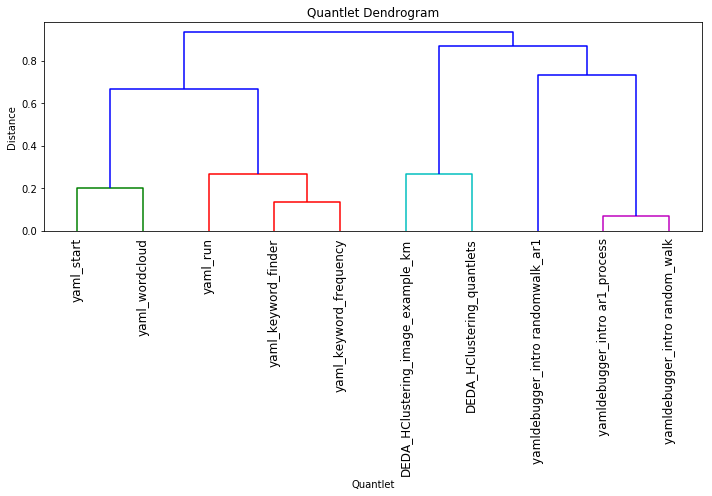

In [6]:
plt.figure(figsize=(10, 7))  
plt.title("Quantlet Dendrogram")  
plt.xlabel('Quantlet')
plt.ylabel('Distance')
Z = shc.linkage(train_X[-10:], method='single', metric='hamming')
dend = shc.dendrogram(Z, labels=labels[-10:], leaf_rotation=90) 
plt.tight_layout()
plt.savefig(f'{IMG_PATH}dendr_small.png', transparent=True)
d = pairwise_distances(train_X[-10:], metric='hamming')

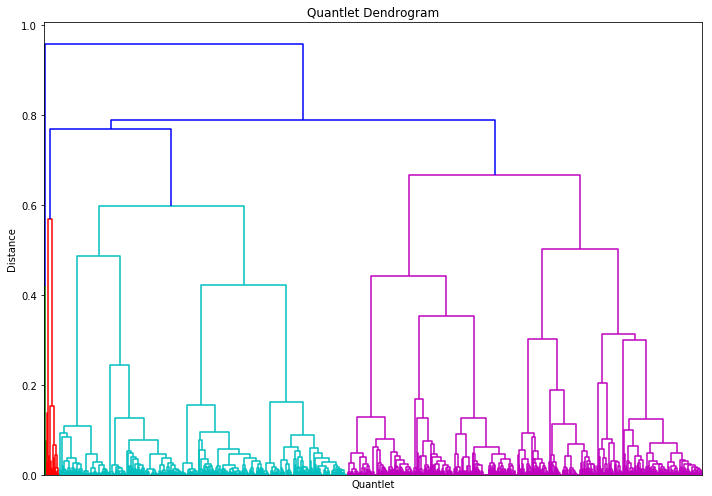

In [7]:
plt.figure(figsize=(10, 7))  
plt.title("Quantlet Dendrogram")  
plt.xlabel('Quantlet')
plt.ylabel('Distance')
Z = shc.linkage(train_X, method='average', metric='cosine')
dend = shc.dendrogram(Z, leaf_rotation=90, no_labels=True, count_sort=True)  
plt.tight_layout()
plt.savefig(f'{IMG_PATH}dendr_full.png', transparent=True)

In [8]:
clusters = fcluster(Z, 0.7, criterion='distance')

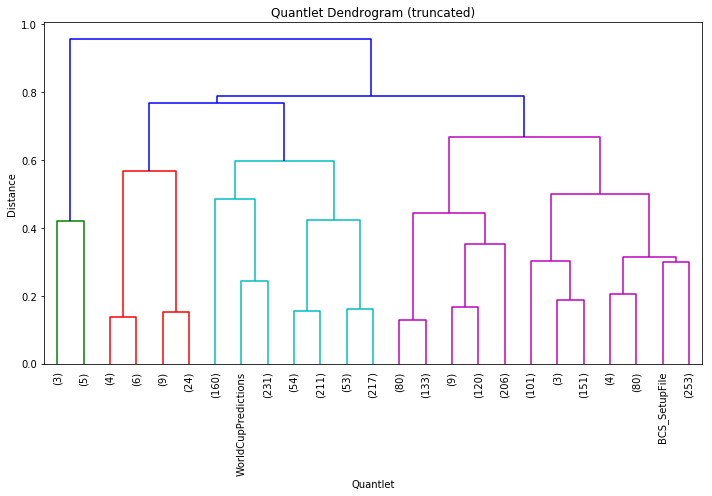

In [9]:
plt.figure(figsize=(10, 7))  
plt.title("Quantlet Dendrogram (truncated)")  
plt.xlabel('Quantlet')
plt.ylabel('Distance')
Z = shc.linkage(train_X,  method='average', metric='cosine')
dend = shc.dendrogram(Z, truncate_mode='lastp', p=25, labels=labels, leaf_rotation=90, count_sort=True)
plt.tight_layout()
plt.savefig(f'{IMG_PATH}dendr_trunc.png', transparent=True)

In [10]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

In [11]:
#Z = shc.linkage(train_X, method='average', metric='cosine')
max_d = 10
#clusters = fcluster(Z, max_d, criterion='maxclust')
cluster_labels = {}  
for i in range(1, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[clusters==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    #print(df.head(20))
    temp = []
    for word in df_.word.values[1:10]:
        if word != 0:
            temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)

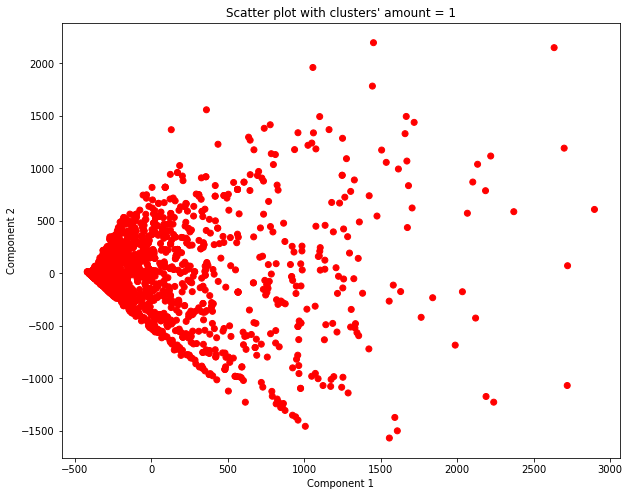

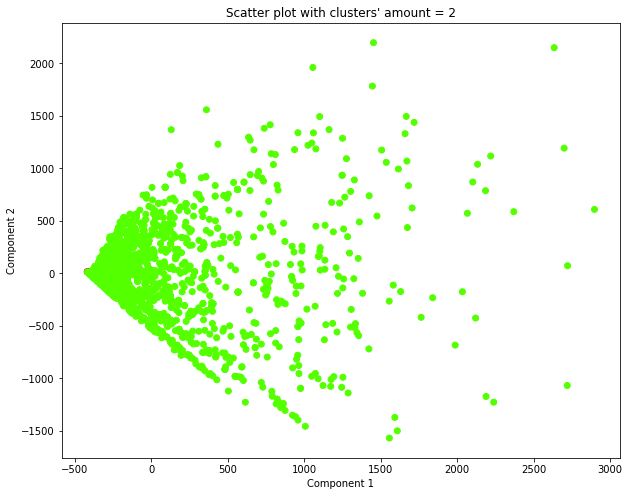

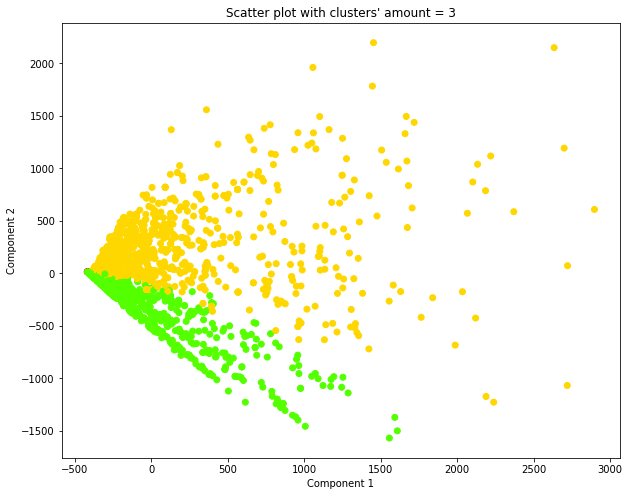

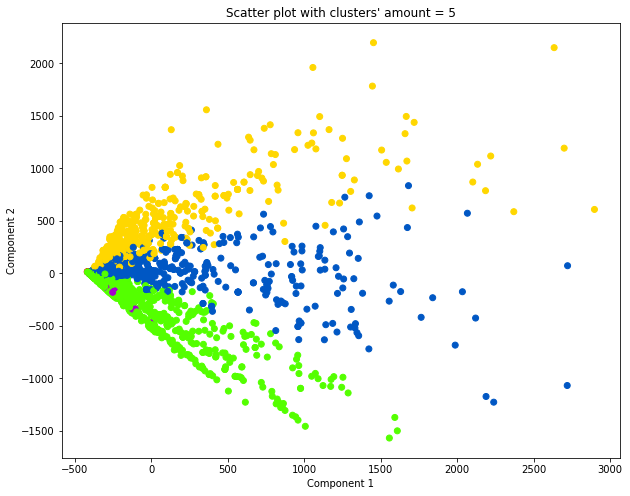

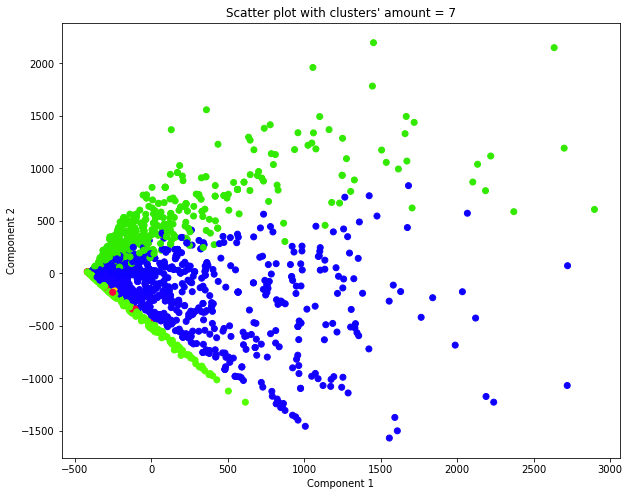

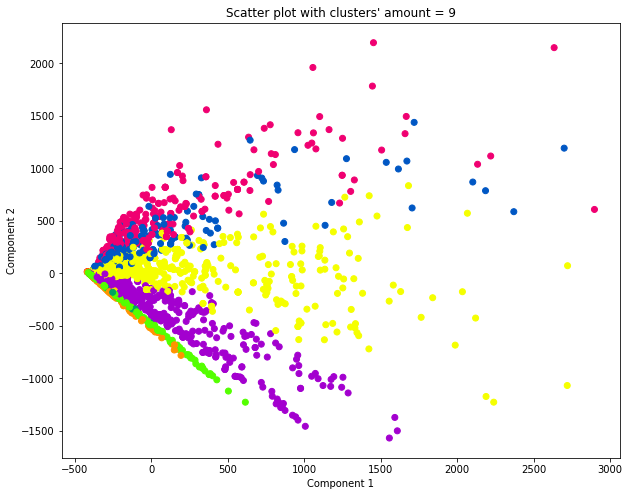

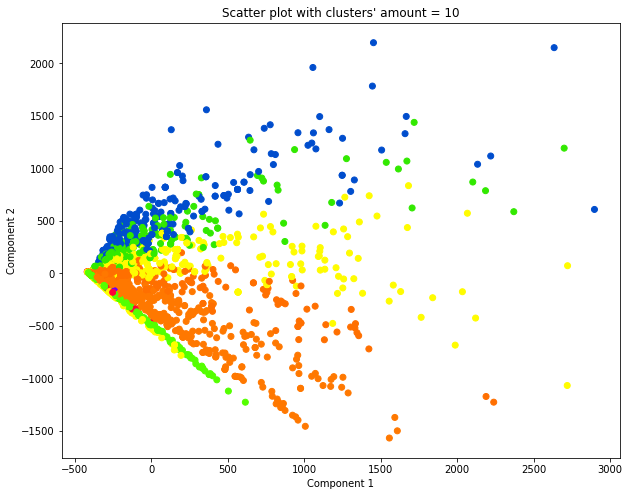

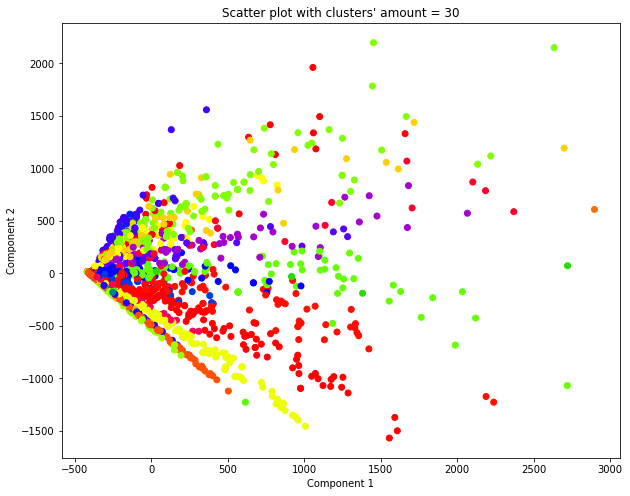

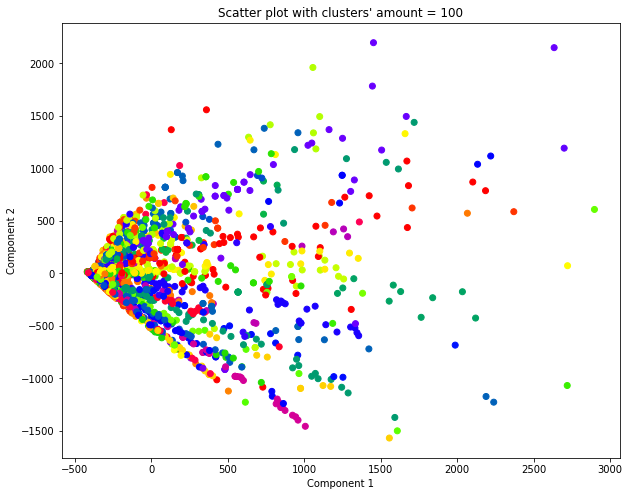

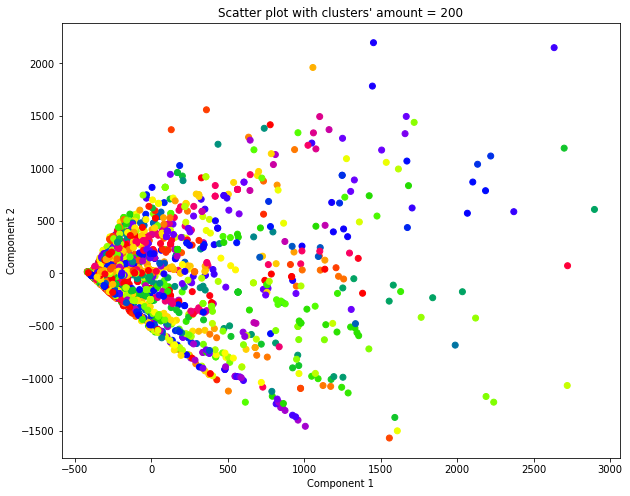

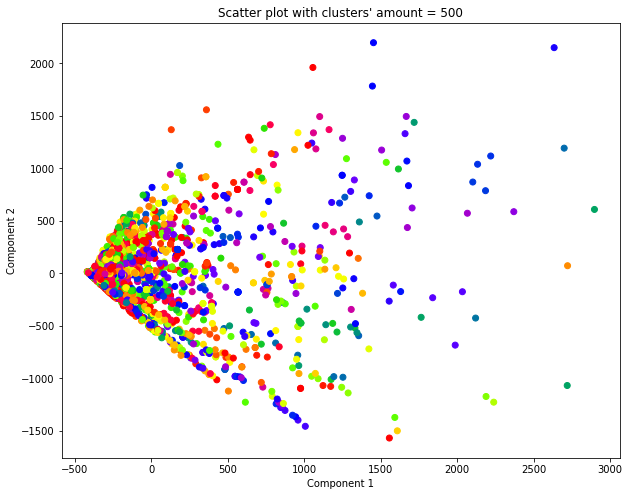

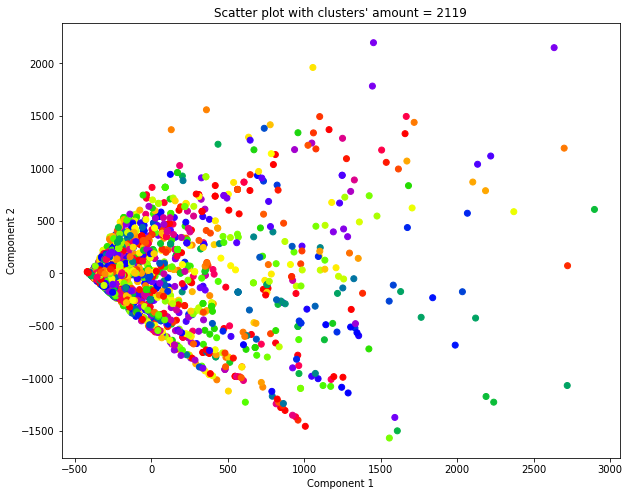

In [12]:
# prepare for plotting
pca = PCA(n_components=2)
pca.fit(train_X)
X = pca.transform(train_X)

for i in [1, 2, 3, 5, 7, 9, 10, 30, 100, 200, 500, len(df.keywords)]:
    max_d = i
    clusters = fcluster(Z, max_d, criterion='maxclust')
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Scatter plot with clusters\' amount = {i}')
    filename=f'{IMG_PATH}/images/for_gif/step'+str(i)+'.png'
    plt.savefig(filename, dpi=96, transparent=True)
    plt.gca()

# 2. Spectral clustering

In [13]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture,cluster
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [14]:
np.random.seed(0)
n_samples = 3000
noisy_circles = datasets.make_moons(n_samples=n_samples,  noise=.05)

E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  f"MiniBatchKMeans is known to have a memory leak on "


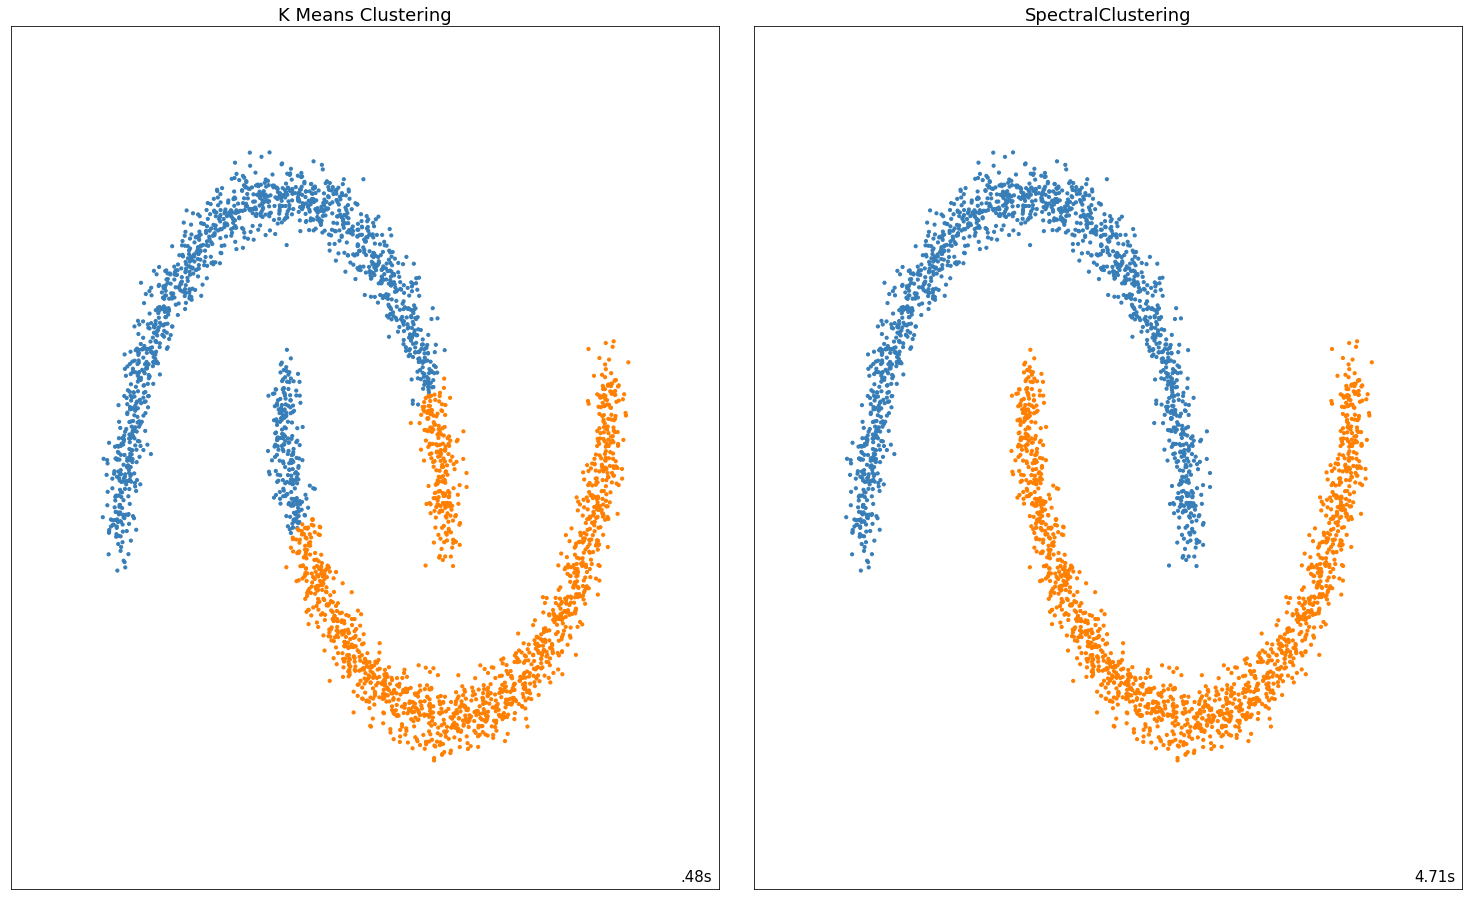

In [15]:
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25})]
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('K Means Clustering', two_means),
        ('SpectralClustering', spectral)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
        
plt.savefig('comparision.png', transparent='True')
plt.show()

# 3. t-SNE clustering

In [16]:
tsne = TSNE(n_components=2)
tsne.fit(train_X)
X_t = tsne.fit_transform(train_X)

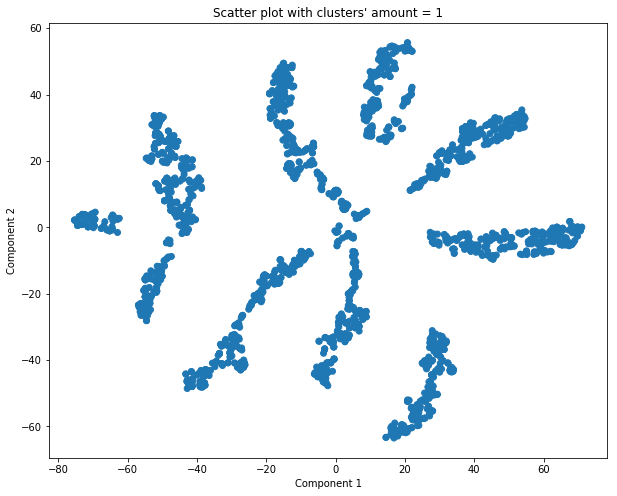

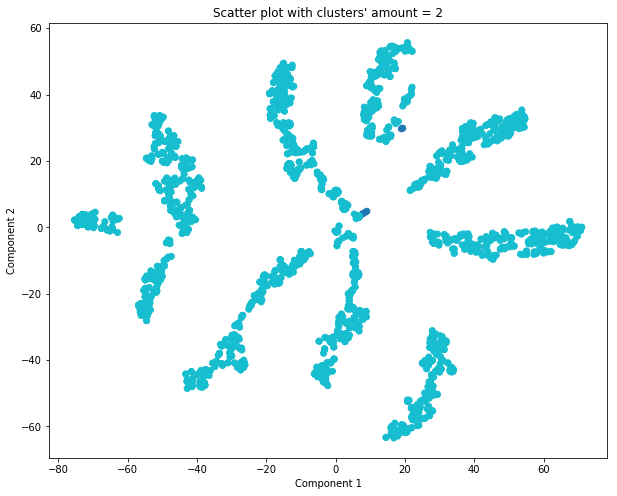

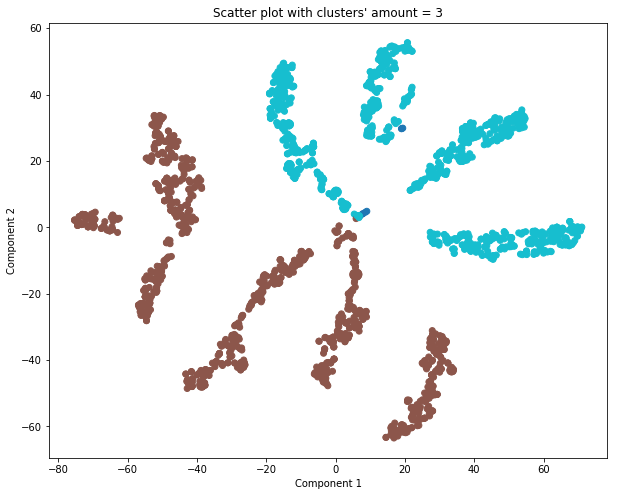

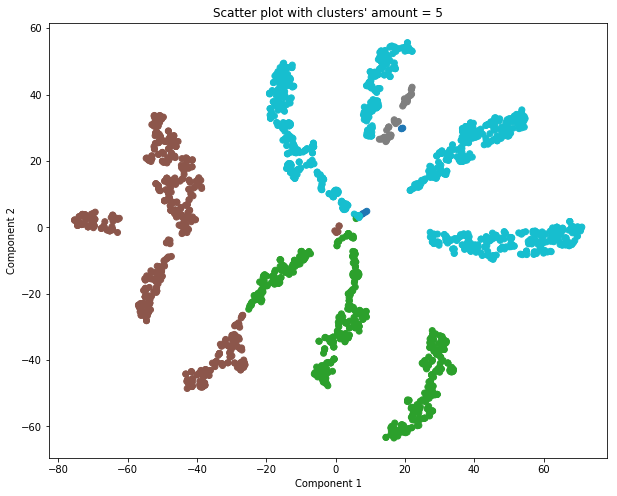

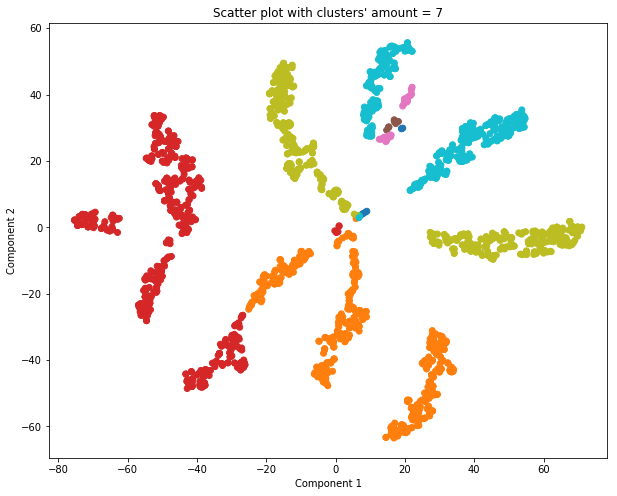

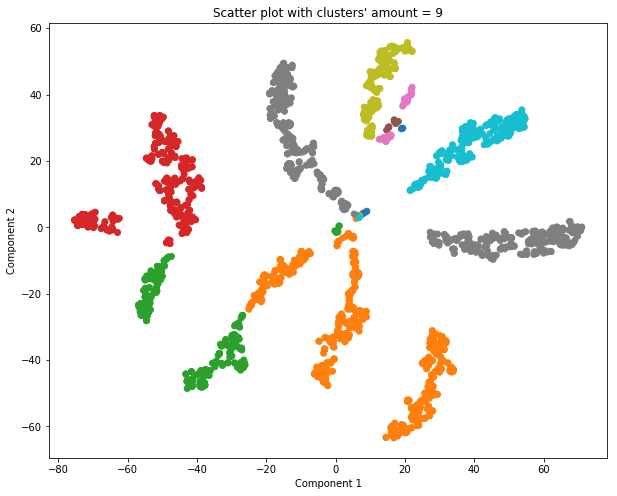

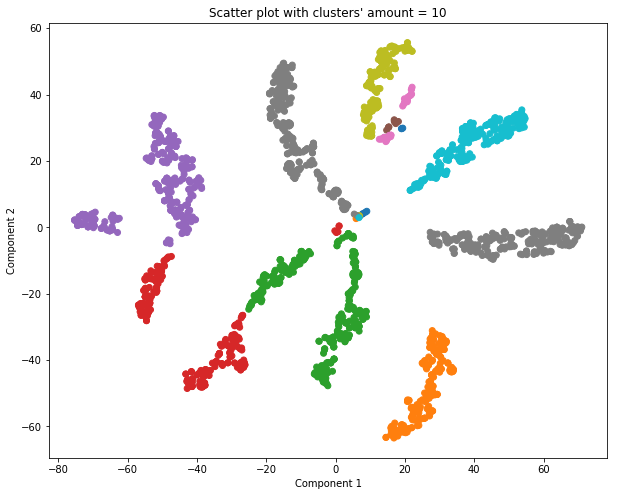

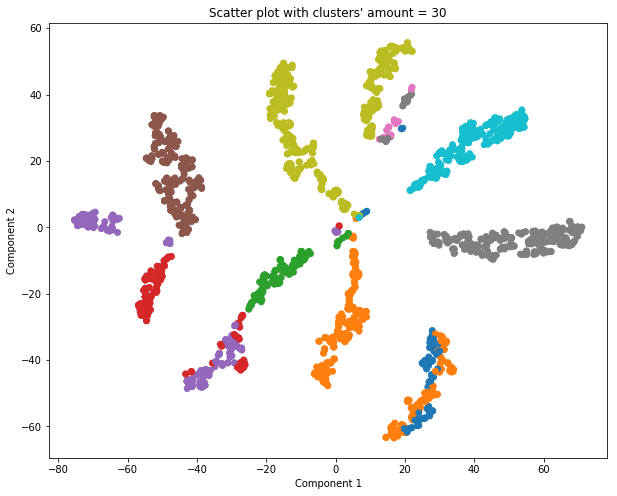

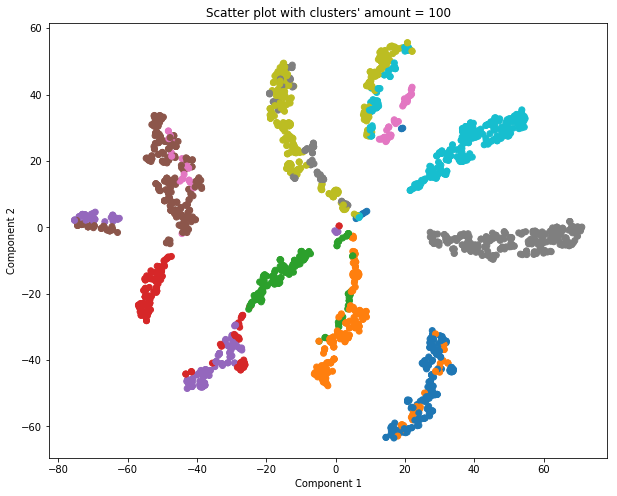

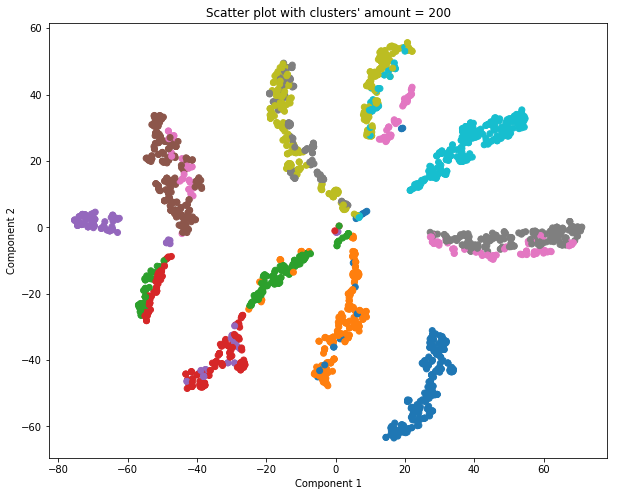

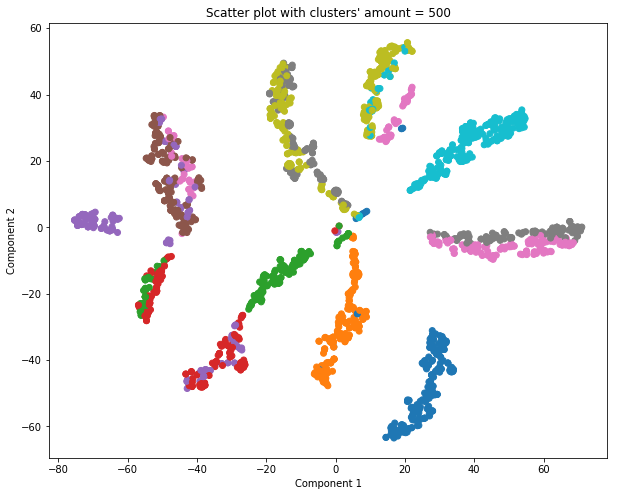

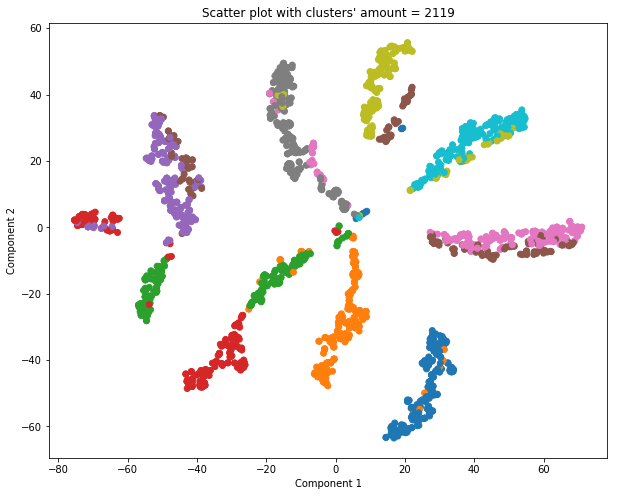

In [17]:
for i in [1, 2, 3, 5, 7, 9, 10, 30, 100, 200, 500, len(df.keywords)]:
    max_d = i
    clusters = fcluster(Z, max_d, criterion='maxclust')
    plt.figure(figsize=(10, 8))
    plt.scatter(X_t[:,0], X_t[:,1], c=clusters, cmap='tab10')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Scatter plot with clusters\' amount = {i}')
    filename=f'{IMG_PATH}/images/for_gif/TSNE_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96, transparent=True)
    plt.gca()

In [18]:
max_d

2119

In [19]:
cluster_labels

{1: 'density kernel plot var algorithm networks animation hash worldmap',
 2: 'plot representation graphical data visualization financial series time estimation',
 3: 'distribution volatility stable estimation model regression autoregressive markov plot',
 4: 'plot graphical representation visualization distribution financial regression data time',
 5: '',
 6: '',
 7: '',
 8: '',
 9: '',
 10: ''}

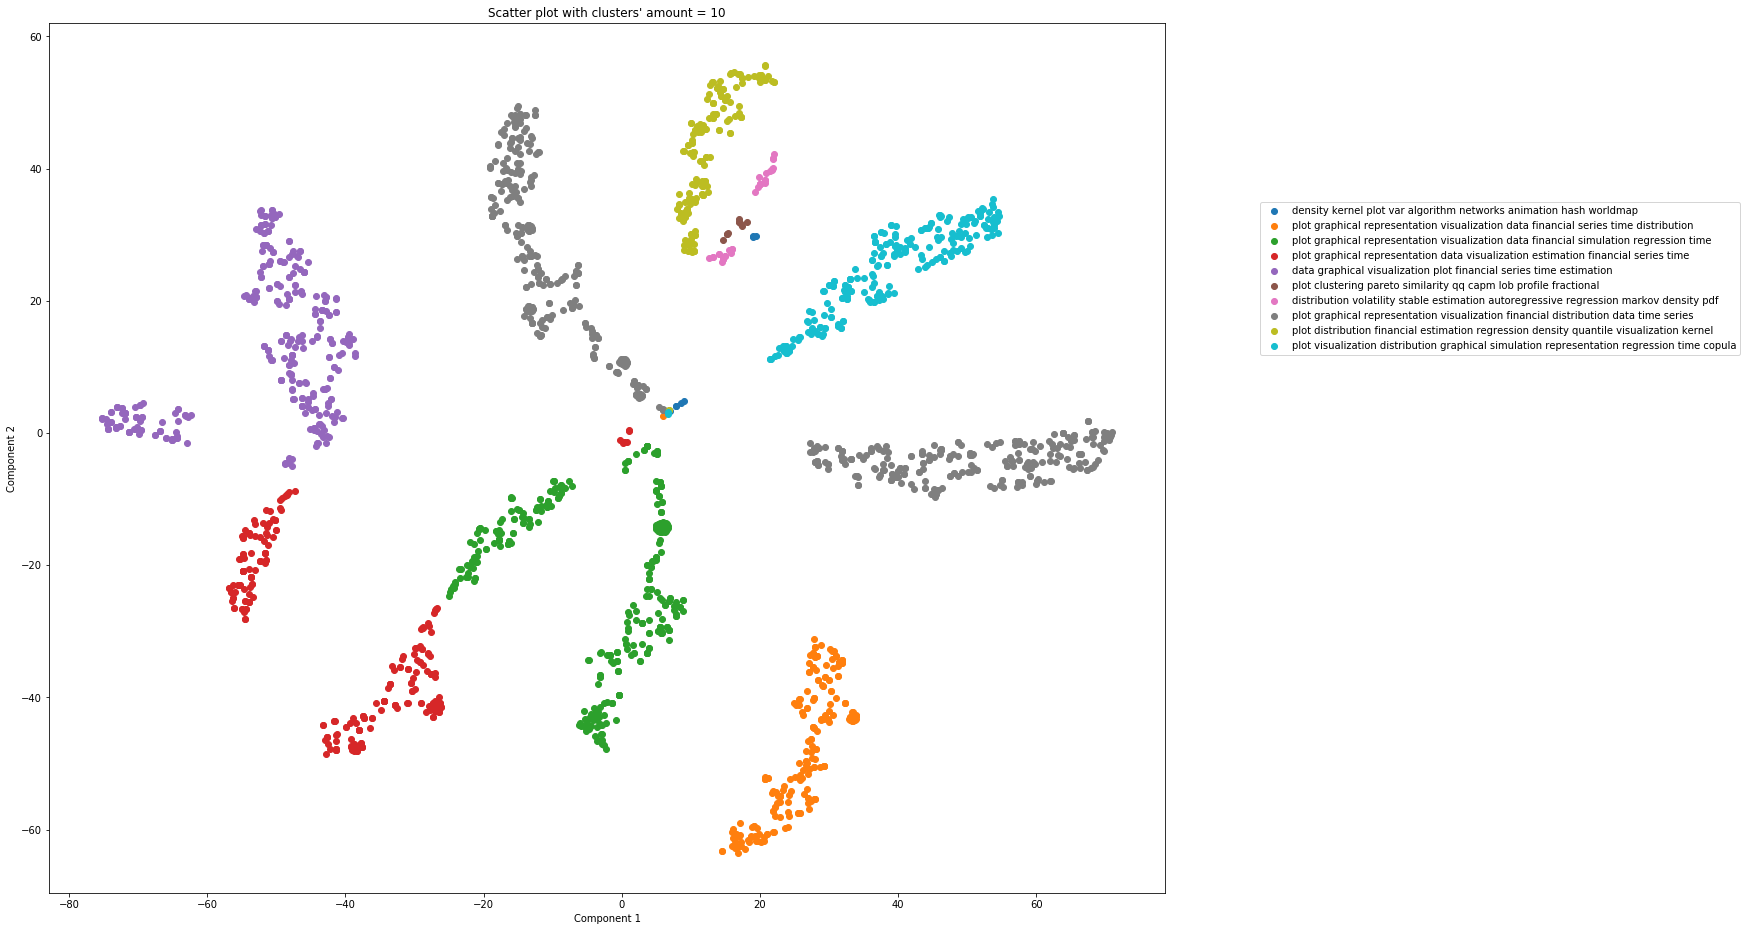

In [20]:
max_d=10
clusters = fcluster(Z, max_d, criterion='maxclust')
plt.figure(figsize=(20, 16))
for i in range(1, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[clusters==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    #print(df.head(20))
    temp = []
    for word in df_.word.values[1:10]:
        if word != 0:
            temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)       
    plt.scatter(X_t[clusters==i,0], X_t[clusters==i,1], label = cluster_labels[i])
#plt.legend(loc = 'upper left', prop={'size': 10})
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), prop={'size': 10})
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Scatter plot with clusters\' amount = {10}')
filename=f'{IMG_PATH}TSNE_10_clusters.png'
plt.savefig(filename, dpi=96, transparent=True)
plt.gca()

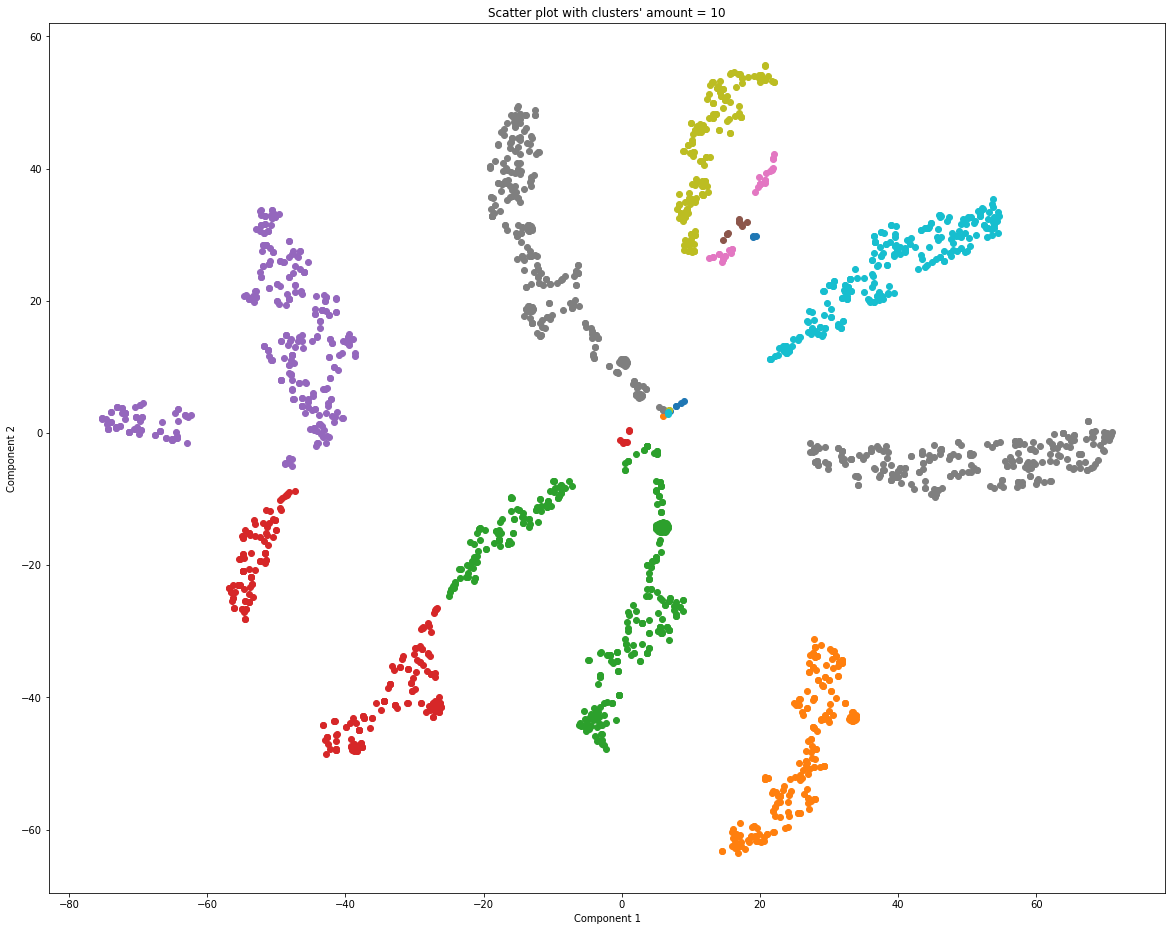

In [21]:
max_d=10
clusters = fcluster(Z, max_d, criterion='maxclust')
plt.figure(figsize=(20, 16))
for i in range(1, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[clusters==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    #print(df.head(20))
    temp = []
    for word in df_.word.values[1:10]:
        if word != 0:
            temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)       
    plt.scatter(X_t[clusters==i,0], X_t[clusters==i,1], label = cluster_labels[i])
#plt.legend(loc = 'upper left', prop={'size': 10})
#plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), prop={'size': 10})
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Scatter plot with clusters\' amount = {10}')
filename=f'{IMG_PATH}TSNE_10_clusters.png'
plt.savefig(filename, dpi=96, transparent=True)
plt.gca()